In [376]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, kpss


In [377]:
dataframe = pd.read_csv('../../data/DailyDelhiClimateTrain.csv')
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe['date'] = dataframe['date'].dt.to_period('M').astype(str)
dataframe.drop(columns=['humidity', 'wind_speed', 'meanpressure'], inplace=True)
dataframe.drop(dataframe.index[-1], inplace=True)
dataframe

,date,meantemp
0,2013-01,10.000000
1,2013-01,7.400000
2,2013-01,7.166667
3,2013-01,8.666667
4,2013-01,6.000000
...,...,...
1456,2016-12,16.850000
1457,2016-12,17.217391
1458,2016-12,15.238095
1459,2016-12,14.095238


# Transformando os dados de diarios para mensais

In [378]:
dataframe = dataframe.groupby('date')['meantemp'].mean().reset_index()
dataframe.set_index('date', inplace=True)
dataframe

,meantemp
date,
2013-01,12.074770
2013-02,16.867560
2013-03,22.814209
2013-04,28.895119
2013-05,33.776767
2013-06,32.480873
2013-07,30.663594
2013-08,29.547773
2013-09,29.840595


In [379]:
px.line(dataframe, x=dataframe.index, y='meantemp')

# Plot de ACF e PACF

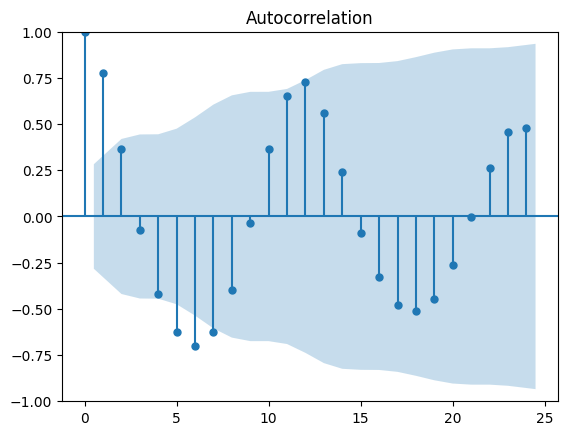

In [380]:
plot_acf(dataframe, lags=24)
plt.show()

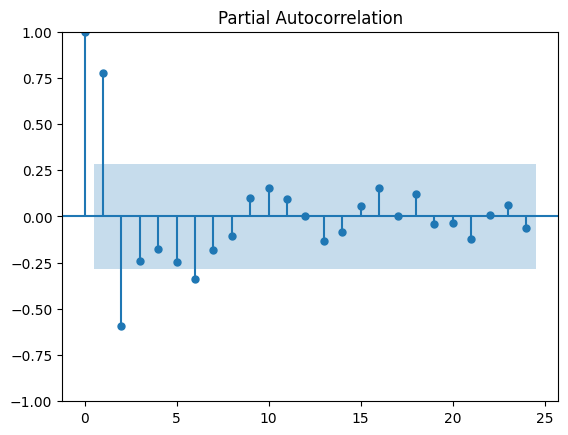

In [381]:
plot_pacf(dataframe, lags=24)
plt.show()

In [382]:
dataframe

,meantemp
date,
2013-01,12.074770
2013-02,16.867560
2013-03,22.814209
2013-04,28.895119
2013-05,33.776767
2013-06,32.480873
2013-07,30.663594
2013-08,29.547773
2013-09,29.840595


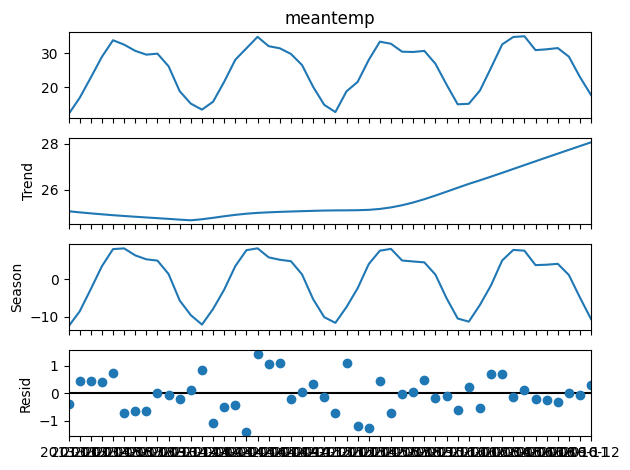

In [383]:
df_colum = dataframe['meantemp']
res = STL(df_colum, period=12).fit()
res.plot()
plt.show()

# Teste de estacionariedade 

In [384]:
result = adfuller(dataframe)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.29190286702070994
p-value: 0.9769699297633486


In [385]:
result = kpss(dataframe)
print('KPSS Statistic:', result[0])
print('p-value:', result[1])

KPSS Statistic: 0.0674196025615499
p-value: 0.1


C:\Users\golf\AppData\Local\Temp\ipykernel_16824\3319380636.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




### Aplicando o AR

In [386]:
model = AutoReg(dataframe['meantemp'],seasonal=True, lags=[1,2,6,12])
modelfit = model.fit()

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [387]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AutoReg Model Results                                
====================================================================================
Dep. Variable:                     meantemp   No. Observations:                   48
Model:             Restr. Seas. AutoReg(12)   Log Likelihood                 -44.938
Method:                     Conditional MLE   S.D. of innovations              0.843
Date:                      Sat, 25 May 2024   AIC                            123.875
Time:                              15:05:14   BIC                            150.795
Sample:                          01-01-2014   HQIC                           133.271
                               - 12-01-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.0548      4.533     -0.453      0.650     -10.938       6.829
s(2,12)          7.0101      1.215      5.770      0.000       4.629       9.391
s(3,12)         11.7904      2.159      5.462      0.000       7.559      16.021
s(4,12)         19.0508      3.456      5.513      0.000      12.278      25.824
s(5,12)         22.7837      4.892      4.658      0.000      13.196      32.371
s(6,12)         23.3390      5.561      4.197      0.000      12.439      34.239
s(7,12)         19.0922      5.444      3.507      0.000       8.423      29.762
s(8,12)         18.9865      4.953      3.833      0.000       9.278      28.695
s(9,12)         16.8792      4.418      3.821      0.000       8.221      25.537
s(10,12)        10.0453      3.449      2.913      0.004       3.285      16.805
s(11,12)         1.8059      2.182      0.828      0.408      -2.470       6.082
s(12,12)        -2.1739      1.235     -1.760      0.078      -4.595       0.247
meantemp.L1      0.5965      0.148      4.018      0.000       0.306       0.887
meantemp.L2      0.0371      0.151      0.246      0.806      -0.259       0.333
meantemp.L6      0.3632      0.127      2.853      0.004       0.114       0.613
meantemp.L12    -0.4038      0.197     -2.046      0.041      -0.791      -0.017
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9955           -0.1603j            1.0083           -0.0254
AR.2             0.9955           +0.1603j            1.0083            0.0254
AR.3             0.7325           -0.7246j            1.0303           -0.1241
AR.4             0.7325           +0.7246j            1.0303            0.1241
AR.5             0.3898           -1.0270j            1.0985           -0.1923
AR.6             0.3898           +1.0270j            1.0985            0.1923
AR.7            -0.2849           -1.0576j            1.0953           -0.2919
AR.8            -0.2849           +1.0576j            1.0953            0.2919
AR.9            -1.0909           -0.2564j            1.1206           -0.4633
AR.10           -1.0909           +0.2564j            1.1206            0.4633
AR.11           -0.7420           -0.8436j            1.1235           -0.3648
AR.12           -0.7420           +0.8436j            1.1235            0.3648
------------------------------------------------------------------------------
"""

In [388]:
predict = modelfit.predict(start=len(dataframe), end=len(dataframe) + 12)

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

C:\Users\golf\PycharmProjects\road_map_datascience\.venv\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



In [389]:
trace1 = go.Scatter(x=dataframe.index, y=dataframe['meantemp'], mode='lines', name='meantemp')
trace2 = go.Scatter(x=predict.index, y=predict.values, mode='lines', name='AR Predict')

# Configurar layout do gráfico
layout = go.Layout(
    title='Previsão da temperatura média',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Valores'),
    template='plotly_dark'
)

# Criar figura
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostrar gráfico
fig.show()